In [1]:
from sqlalchemy import create_engine
import config as cfg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("postgresql://" + cfg.mysql["user"] + ":" + cfg.mysql["passwd"] + 
                       "@localhost:5432/" + cfg.mysql["db"])

In [3]:
connection = engine.connect()

In [4]:
#departments = pd.read_sql(f"SELECT * FROM departments" , connection)
#dept_emp = pd.read_sql(f"SELECT * FROM dept_emp" , connection)
#dept_manager = pd.read_sql(f"SELECT * FROM dept_manager" , connection)
#employees = pd.read_sql(f"SELECT * FROM employees" , connection)
salaries = pd.read_sql(f"SELECT * FROM salaries" , connection)
titles = pd.read_sql(f"SELECT * FROM titles" , connection)

In [5]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [6]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [7]:
combined_data = pd.merge(salaries, titles, on="emp_no", how="inner")
combined_data.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


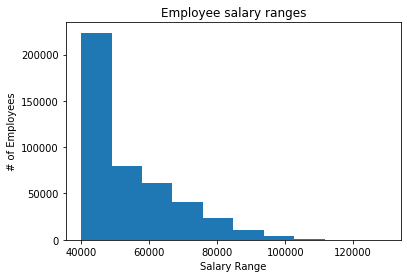

In [9]:
x = combined_data["salary"]

plt.hist(x)
plt.xlabel("Salary Range")
plt.ylabel("# of Employees")
plt.title("Employee salary ranges")
plt.show()

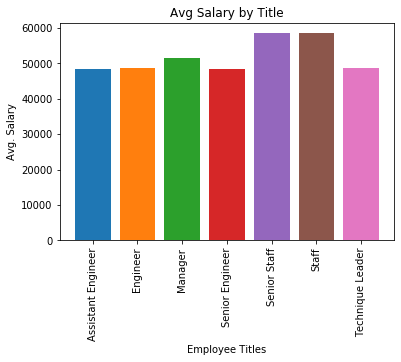

In [10]:
mean_salary = combined_data["salary"].groupby(combined_data["title"]).mean().to_frame()
mean_salary = mean_salary.reset_index()

x_value = mean_salary["title"]
y_value = mean_salary["salary"]

plt.bar(x_value, y_value, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'])
plt.xticks(rotation=90)
plt.xlabel("Employee Titles")
plt.ylabel("Avg. Salary")
plt.title("Avg Salary by Title")
plt.show()

In [51]:
employee = combined_data.loc[combined_data["emp_no"]==499942]
employee

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
443224,499942,40000,1998-03-28,1999-03-28,Technique Leader,1998-03-28,9999-01-01
